In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib.lines import Line2D

# Setting the style for Seaborn visualizations
sns.set_style("whitegrid")

# These libraries enable the visualizations for the subsequent cells

In [3]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 1. Distribution Analysis for Key Columns
#### Justification:
Analyzing the distribution of variables like `age`, `bmi`, `charges`, and `children` helps us understand their spread, common values, and whether there are any anomalies or outliers.
#### Visualizations:
- **Histogram**:
    - **Age**: Show the distribution of age to identify the most common age range among insurance holders.
    - **BMI**: Analyze whether the BMI distribution skews toward obesity or leans toward healthy BMI ranges.
    - **Charges**: Explore the distribution of insurance charges to identify if it's skewed due to high-cost outliers.
    - **Number of children**: Visualize the count of individuals with specific numbers of children.

- **Boxplots**:
    - For numeric data like `charges` and `BMI`, boxplots can highlight outliers effectively.

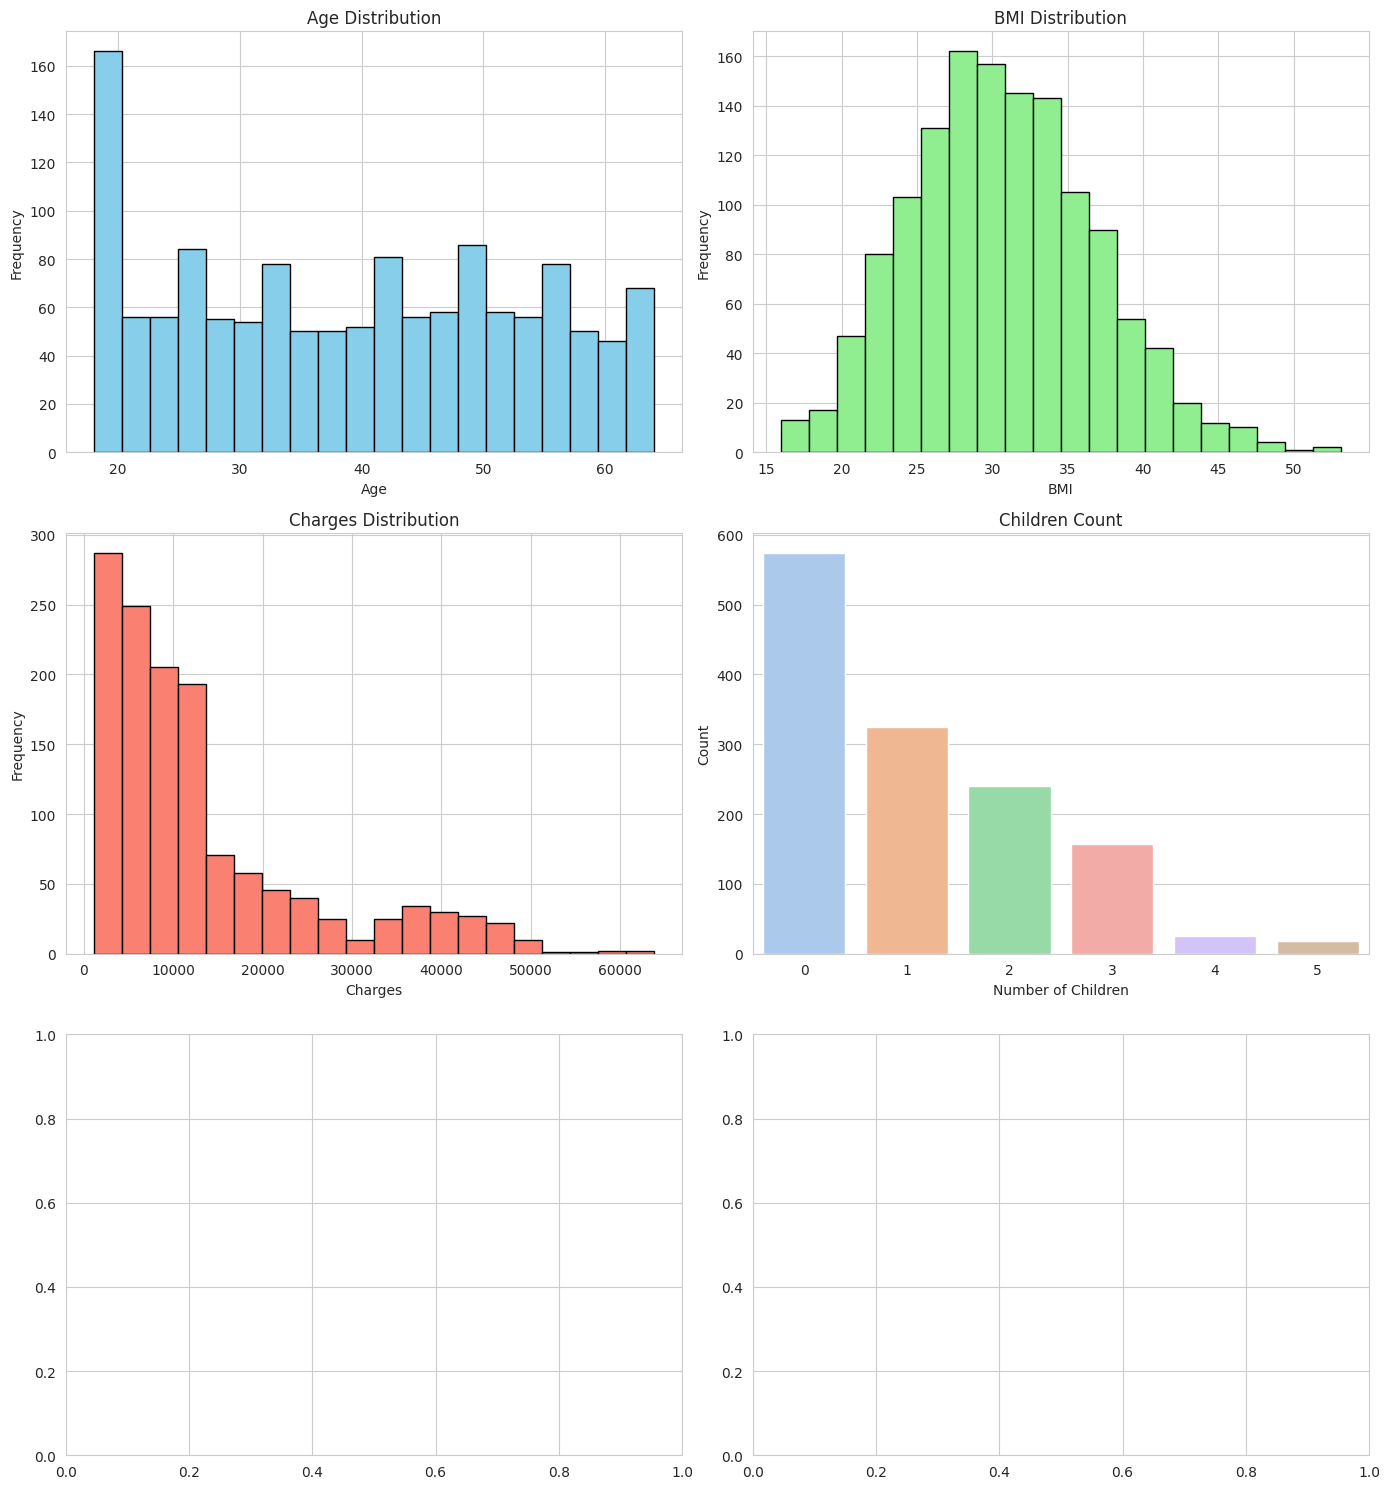

In [4]:
# Set up the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Histograms
axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['bmi'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['charges'], bins=20, color='salmon', edgecolor='black')
axes[1, 0].set_title('Charges Distribution')
axes[1, 0].set_xlabel('Charges')
axes[1, 0].set_ylabel('Frequency')

# Bar plot for 'children' column
sns.countplot(x='children', hue='children', data=df, ax=axes[1, 1], palette='pastel', legend=False)
axes[1, 1].set_title('Children Count')
axes[1, 1].set_xlabel('Number of Children')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### 2. Relationship Between Smoking and Insurance Charges
#### Justification:
Smoking can have a significant impact on insurance charges. Visualizing this relationship can confirm whether smokers pay higher premiums on average.
#### Visualizations:
- **Boxplot**:
    - Show the distribution of charges for `smoker` vs. `non-smoker` groups. This will help highlight the difference in premiums between these two groups.

- **Violin Plot**:
    - A violin plot can complement the boxplot by showing density distribution for charges based on the `smoker` values.

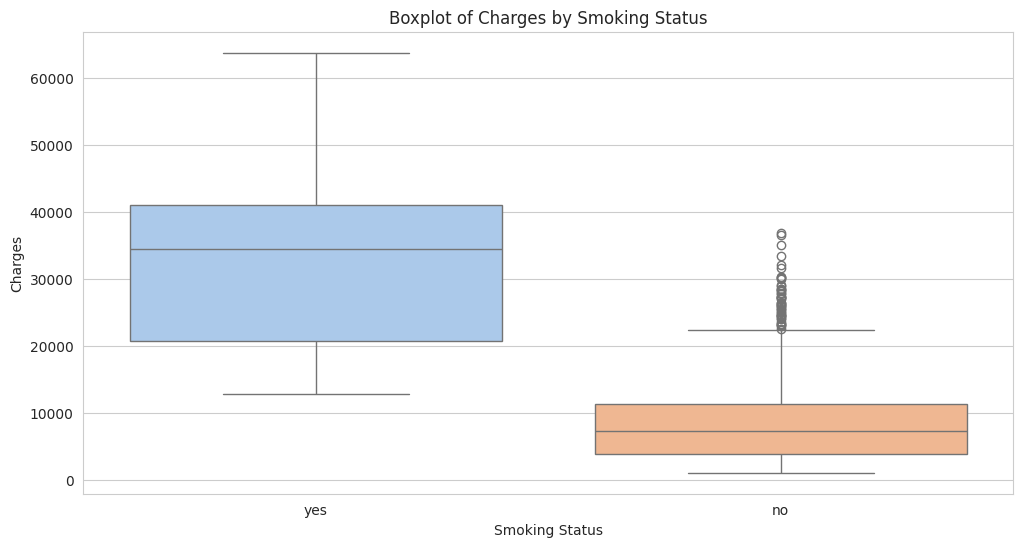

In [5]:
# Boxplot for smoker vs. non-smoker charges
plt.figure(figsize=(12, 6))
sns.boxplot(x='smoker', y='charges', data=df, hue='smoker', palette='pastel', legend=False)
plt.title('Boxplot of Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()

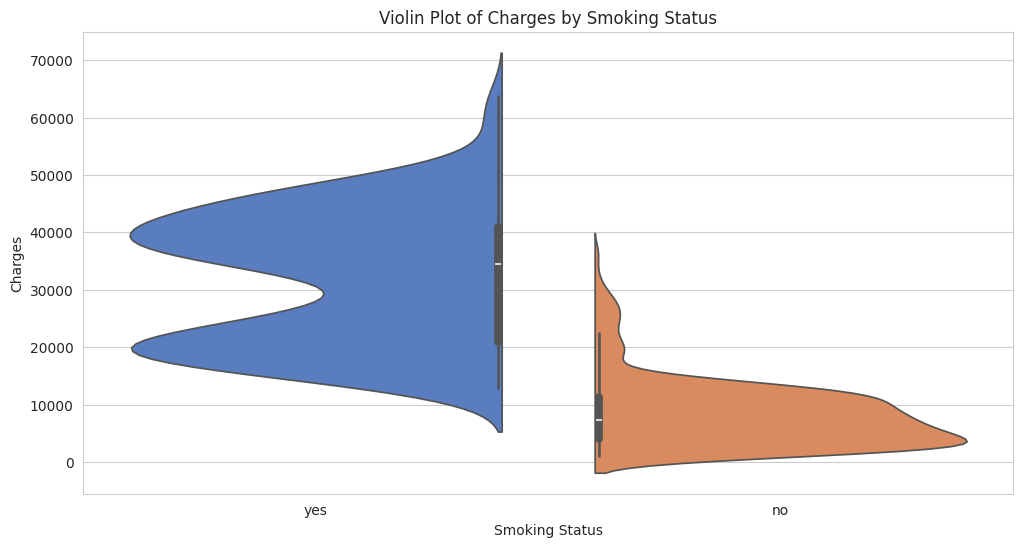

In [6]:
# Violin plot for smoker vs. non-smoker charges
plt.figure(figsize=(12, 6))
sns.violinplot(x='smoker', y='charges', data=df, hue='smoker', palette='muted', split=True, legend=False)
plt.title('Violin Plot of Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.show()


### 3. Age, BMI, and Charges Interaction
#### Justification:
Both age and BMI are likely to influence insurance charges. Visualizing the interactions between these variables can help to identify how they combine to affect costs.
#### Visualizations:
- **Scatter Plot with Regression**:
    - Scatter `age` vs. `charges`, color-coded by smoking status (`smoker` or `non-smoker`), to identify patterns like increased premiums for older smokers.
    - Scatter `bmi` vs. `charges`, using smoking or region as a color dimension.

- **3D Scatter Plot**:
    - A 3D scatter plot with `age`, `BMI`, and `charges` can provide a holistic view of the interaction.

<Figure size 1200x600 with 0 Axes>

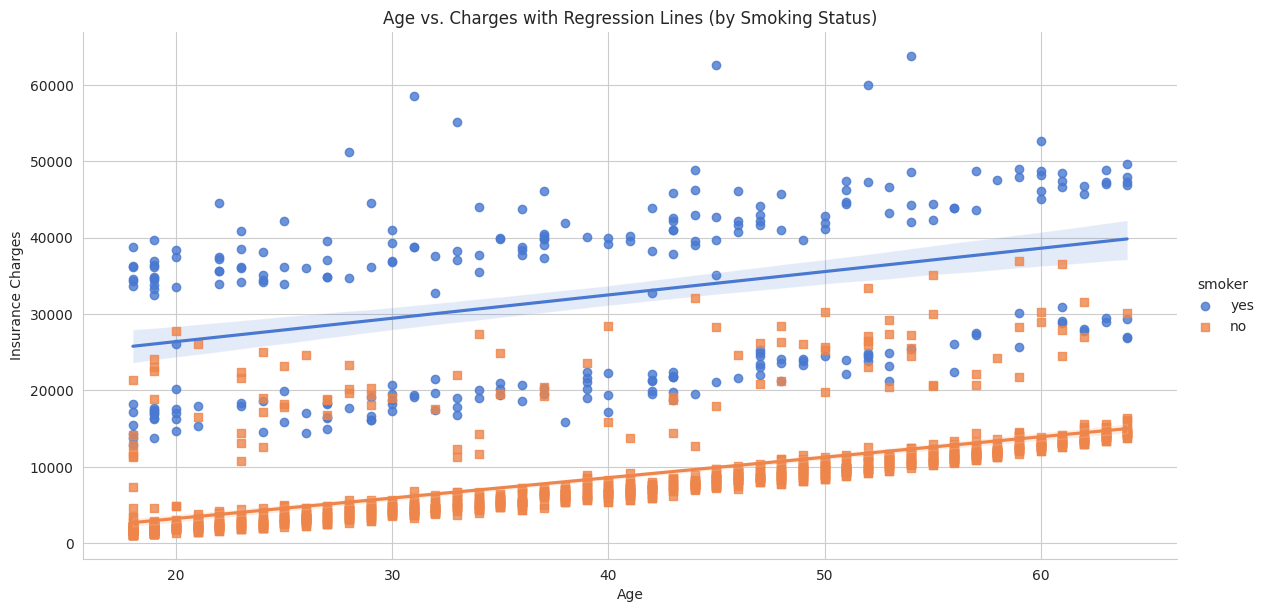

<Figure size 1200x600 with 0 Axes>

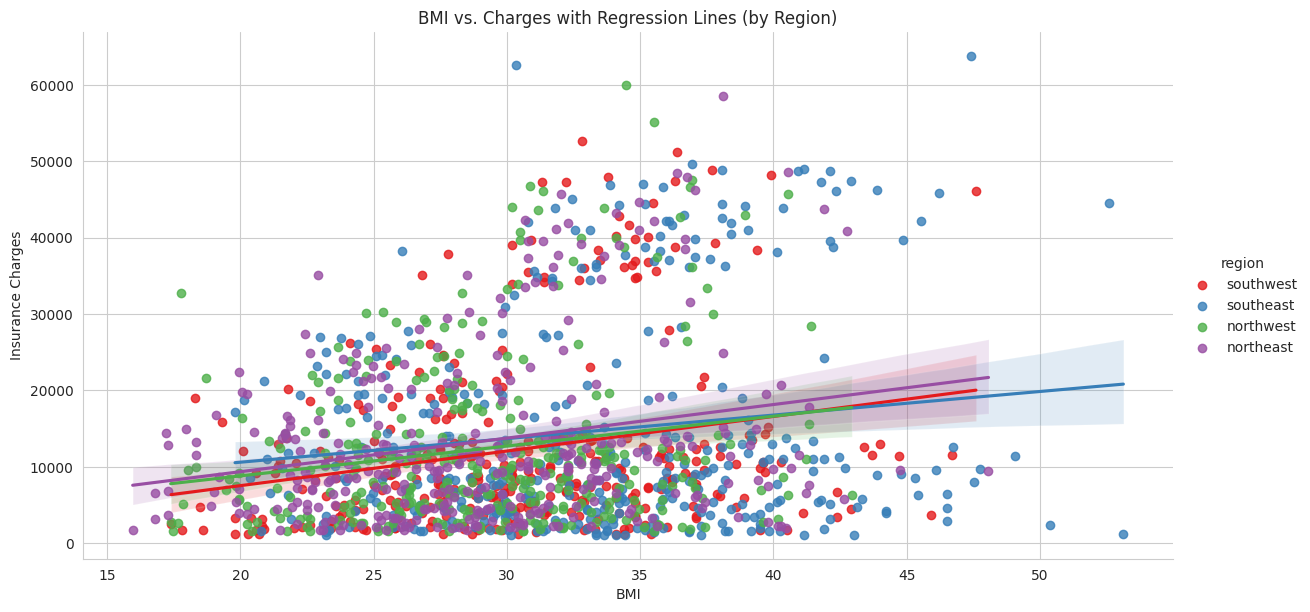

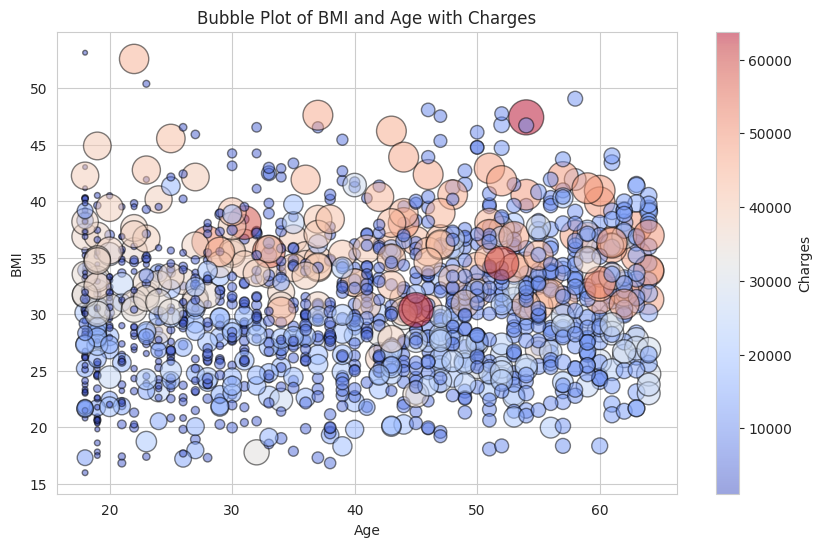

In [7]:
# Scatter Plot with Regression for 'age' vs. 'charges', color-coded by 'smoker' status
plt.figure(figsize=(12, 6))
sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=6, aspect=2, palette='muted', markers=['o', 's'])
plt.title('Age vs. Charges with Regression Lines (by Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

# Scatter Plot with Regression for 'bmi' vs. 'charges', color-coded by 'region'
plt.figure(figsize=(12, 6))
sns.lmplot(x='bmi', y='charges', hue='region', data=df, height=6, aspect=2, palette='Set1')
plt.title('BMI vs. Charges with Regression Lines (by Region)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

plt.figure(figsize=(10, 6))
bubble_sizes = df["charges"] / 100  # Scale down the sizes for better readability
plt.scatter(df["age"], df["bmi"], s=bubble_sizes, alpha=0.5, c=df["charges"], cmap="coolwarm", edgecolor="k")
plt.title("Bubble Plot of BMI and Age with Charges")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.colorbar(label="Charges")
plt.show()


pivot_table = df.pivot_table(index="age", columns="bmi", values="charges", aggfunc="mean")

SR
### 4. Regional Distribution of Charges and Smokers
#### Justification:
Insurance charges and lifestyle factors like smoking may vary across regions (`northeast`, `northwest`, etc.). Visualizing these regional trends is critical for understanding geographic variations.
#### Visualizations:
- **Bar Plot**:
    - Plot the number of people in each region to analyze the sample size distribution.
    - Summarize average charges by region to spot trends.
    - Use a side-by-side bar plot to compare smoker vs. non-smoker proportions across regions.

- **Heatmap**:
    - A heatmap showing average `charges` by `region` and `smoker` status is another intuitive way to understand regional costs.

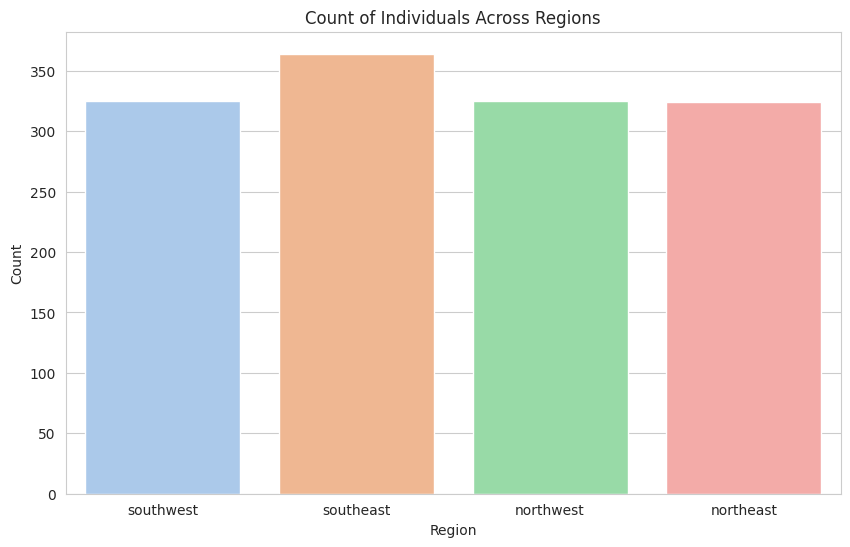

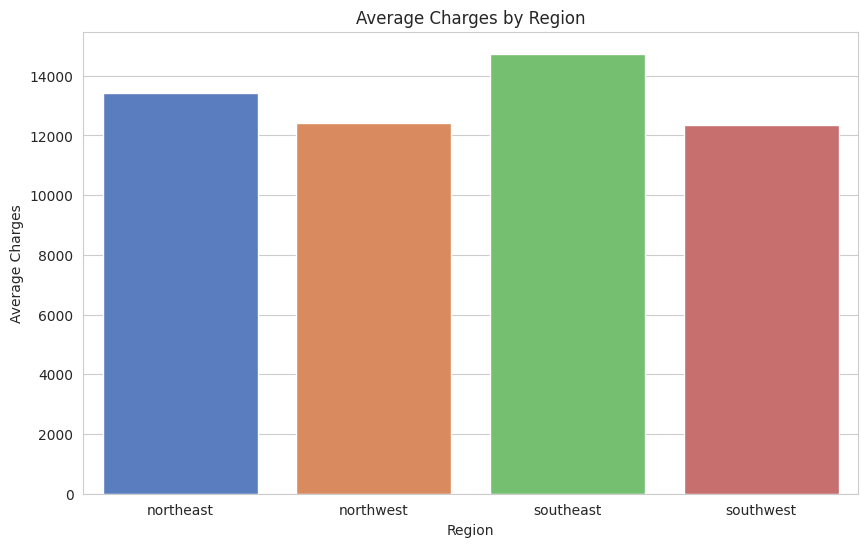

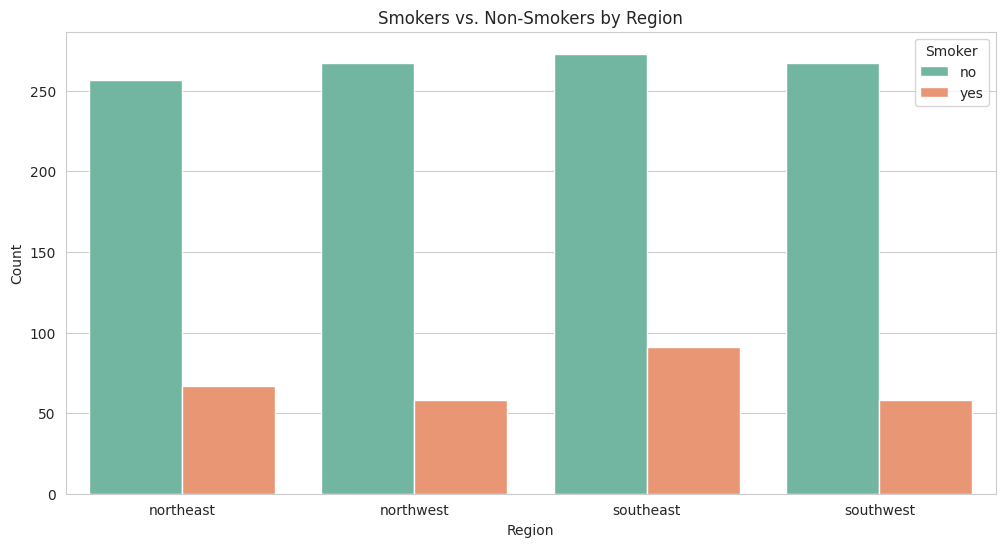

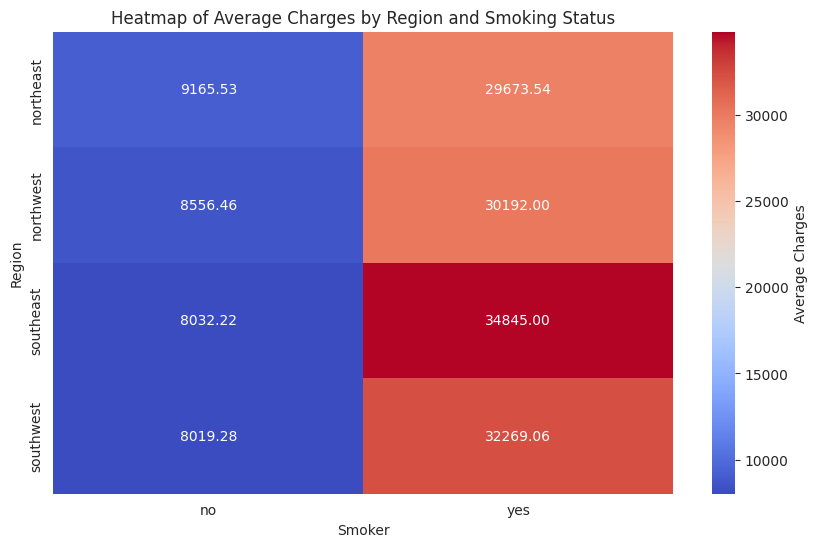

In [8]:
# Bar Plot: Count of individuals per region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='region', data=df, palette='pastel', legend=False)
plt.title('Count of Individuals Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Bar Plot: Average charges by region
plt.figure(figsize=(10, 6))
region_charges = df.groupby('region')['charges'].mean().reset_index()
sns.barplot(x='region', y='charges', hue='region', data=region_charges, palette='muted', legend=False)
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

# Side-by-side Bar Plot: Smokers vs Non-Smokers by Region
plt.figure(figsize=(12, 6))
smoker_region = df.groupby(['region', 'smoker']).size().reset_index(name='count')
sns.barplot(x='region', y='count', hue='smoker', data=smoker_region, palette='Set2')
plt.title('Smokers vs. Non-Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

# Heatmap: Average charges by region and smoker status
heatmap_data = df.groupby(['region', 'smoker'])['charges'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Average Charges'})
plt.title('Heatmap of Average Charges by Region and Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Region')
plt.show()


### 5. Impact of Number of Children on Charges
#### Justification:
The number of children could be a factor influencing insurance costs. Understanding this relationship helps identify if individuals with more dependents pay substantially different premiums.
#### Visualizations:
- **Boxplot**:
    - Show the distribution of insurance charges by the `children` column.

- **Bar Chart**:
    - Plot average insurance charges per child count to identify possible trends.

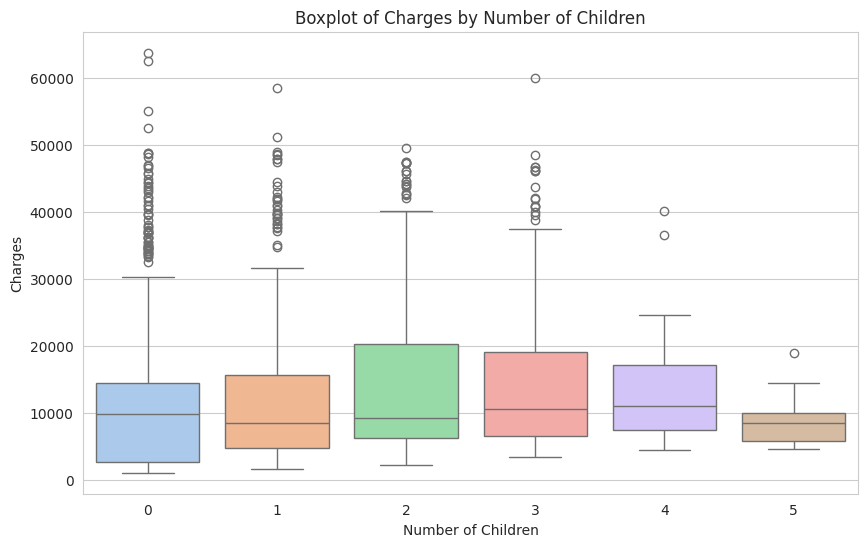

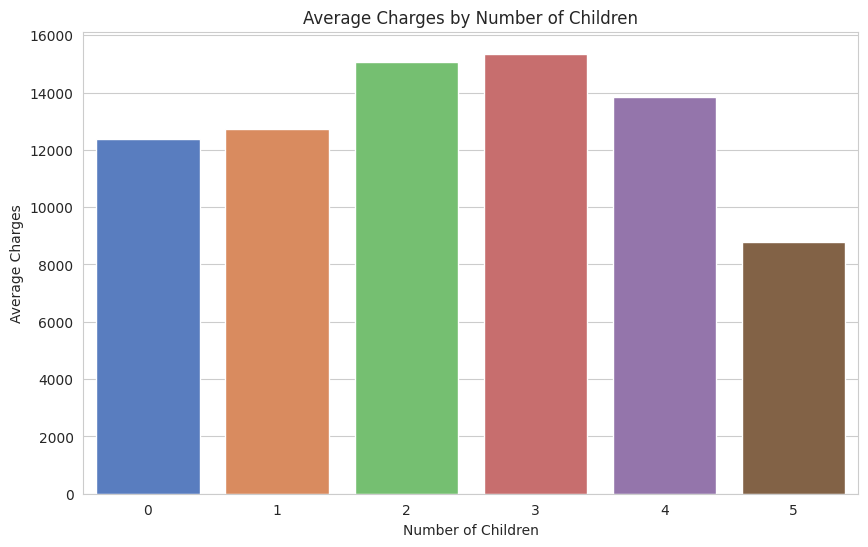

In [9]:
# Boxplot: Charges distribution by number of children
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', hue='children', data=df, palette='pastel', legend=False)
plt.title('Boxplot of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

# Bar Chart: Average charges by number of children
plt.figure(figsize=(10, 6))
children_charges = df.groupby('children')['charges'].mean().reset_index()
sns.barplot(x='children', y='charges', hue='children', data=children_charges, palette='muted', legend=False)
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()



### 6. Gender Analysis of Insurance Premiums
#### Justification:
Exploring whether gender (`sex`) plays a role in insurance charges could reveal if insurance premiums are influenced by gender biases or other factors.
#### Visualizations:
- **Boxplot**:
    - Show the distribution of charges for `male` vs. `female` individuals.

- **Bar Chart**:
    - Plot average charges for male and female individuals, grouped by `smoker` and `non-smoker` categories.

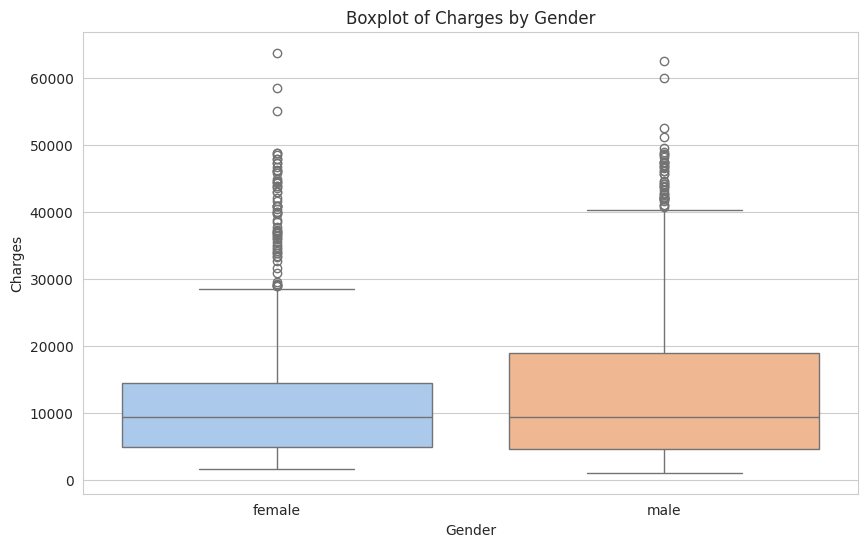

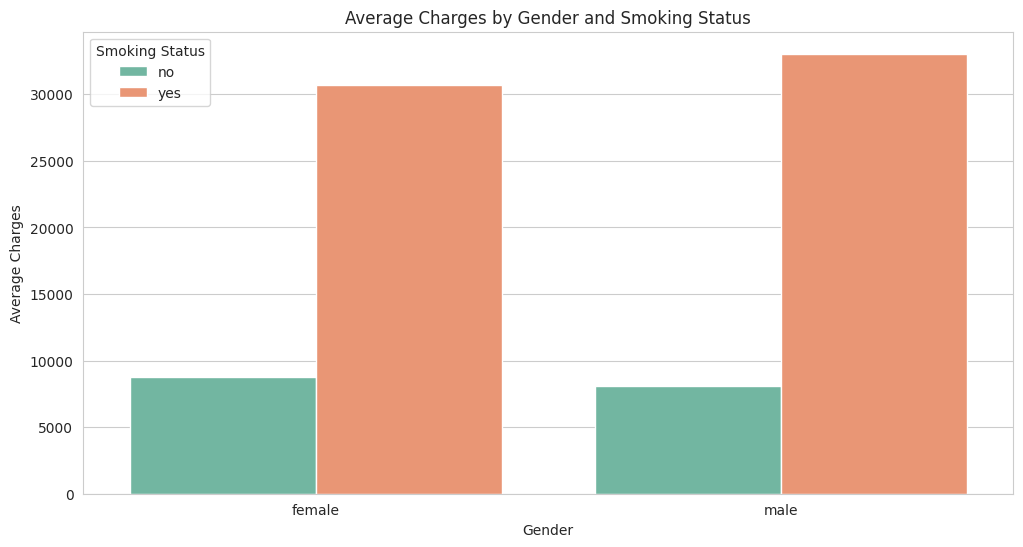

In [10]:
# Boxplot: Distribution of charges by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', hue='sex', data=df, palette='pastel', legend=False)
plt.title('Boxplot of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

# Bar Chart: Average charges by gender and smoking status
plt.figure(figsize=(12, 6))
gender_smoker_charges = df.groupby(['sex', 'smoker'])['charges'].mean().reset_index()
sns.barplot(x='sex', y='charges', hue='smoker', data=gender_smoker_charges, palette='Set2')
plt.title('Average Charges by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Average Charges')
plt.legend(title='Smoking Status')
plt.show()


### 7. Correlation Matrix
#### Justification:
A correlation matrix can help identify relationships between numerical variables such as `age`, `BMI`, `charges`, and `children`. This can direct further analysis toward the variables showing strong correlations.
#### Visualizations:
- **Heatmap**:
    - Create a correlation heatmap to visualize the strength of relationships between numerical variables.

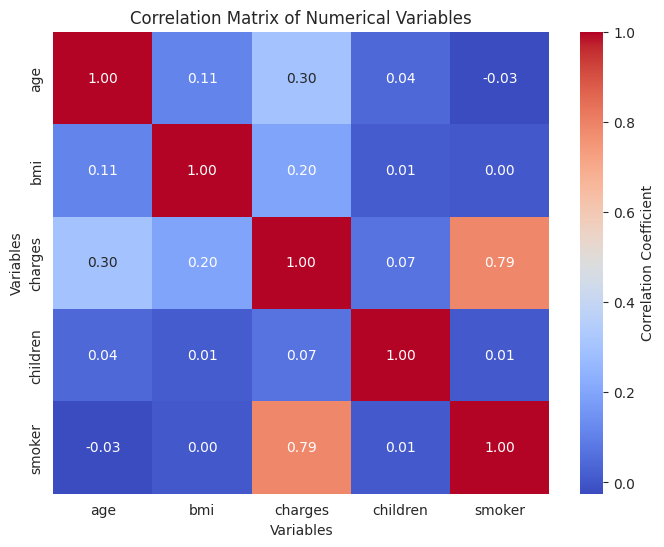

In [11]:
# Transform the 'smoker' column into binary values
matrix = df.copy()
matrix['smoker'] = matrix['smoker'].map({'yes': 1, 'no': 0})

# Calculate the correlation matrix
correlation_matrix = matrix[['age', 'bmi', 'charges', 'children', 'smoker']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


### 8. High-Cost Outlier Analysis
#### Justification:
Charge outliers (significantly higher premiums) could represent individuals with specific characteristics (e.g., smokers, high BMI, or elderly individuals). Investigating this provides insights into extreme cases.
#### Visualizations:
- **Scatter Plot**:
    - Highlight individuals with very high charges and color the points by smoking and region to investigate patterns.

- **Boxplot**:
    - Showcase outliers in charges related to smoker, BMI, or region categories.

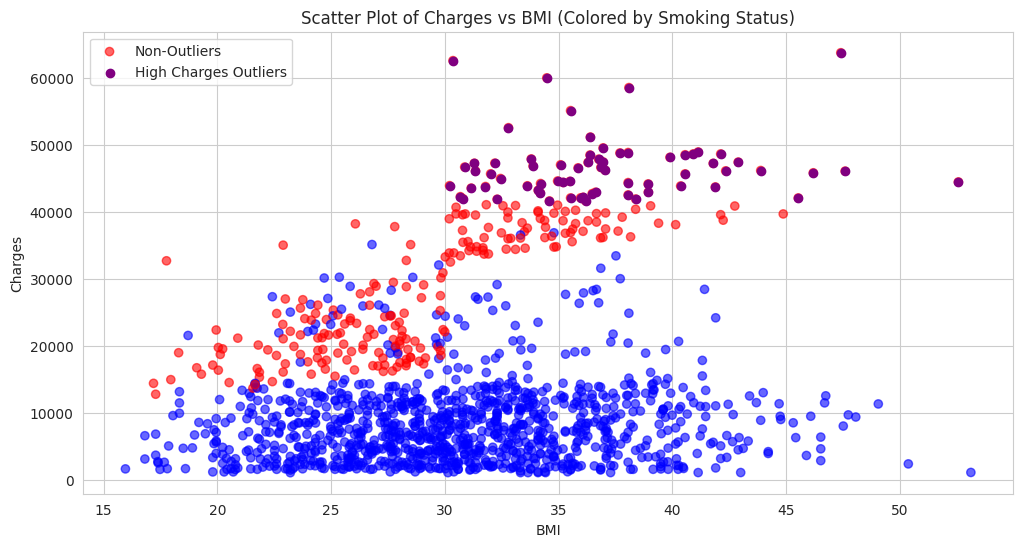

Text(0, 0.5, 'Charges')

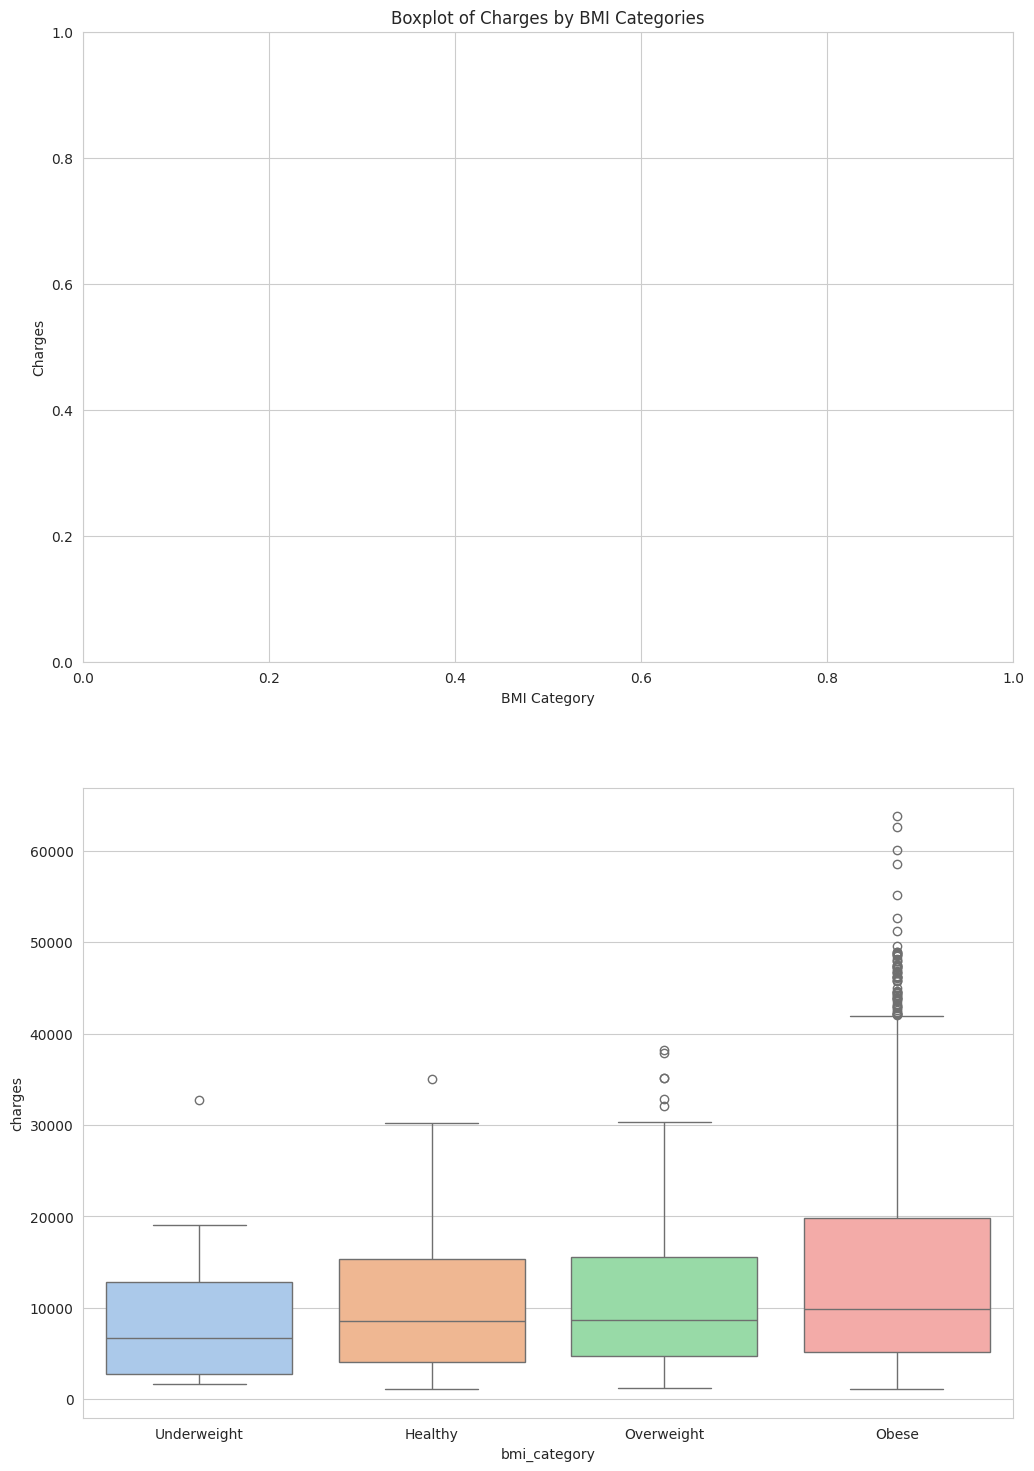

In [12]:
# Scatter plot: Charges vs BMI with high-cost outliers highlighted
plt.figure(figsize=(12, 6))
high_charge_threshold = df['charges'].quantile(0.95)
colors = {'yes': 'red', 'no': 'blue'}
scatter = plt.scatter(df['bmi'], df['charges'],
                      c=df['smoker'].map(colors),
                      alpha=0.6, label='Charges')
plt.scatter(df[df['charges'] > high_charge_threshold]['bmi'],
            df[df['charges'] > high_charge_threshold]['charges'],
            color='purple',
            label='High Charges Outliers')
plt.title('Scatter Plot of Charges vs BMI (Colored by Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(['Non-Outliers', 'High Charges Outliers'], loc='upper left')
plt.show()

# Boxplots to identify outliers in charges
fig, axes = plt.subplots(2, 1, figsize=(12, 18))

# Boxplot grouped by BMI categories
bins = [0, 18.5, 24.9, 29.9, df['bmi'].max()]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)
sns.boxplot(x='bmi_category', y='charges', hue='bmi_category', data=df, palette='pastel', legend=False, ax=axes[1])
axes[0].set_title('Boxplot of Charges by BMI Categories')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Charges')


Unique regions: ['southwest' 'southeast' 'northwest' 'northeast']
Counts per region:
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Region-wise mean/median charges:
       region          mean        median  count
0  northeast  13406.384516  10057.652025    324
1  northwest  12417.575374   8965.795750    325
2  southeast  14735.411438   9294.131950    364
3  southwest  12346.937377   8798.593000    325


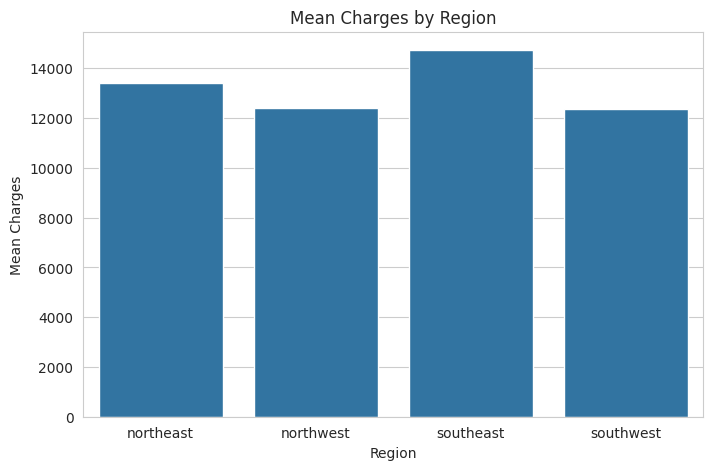

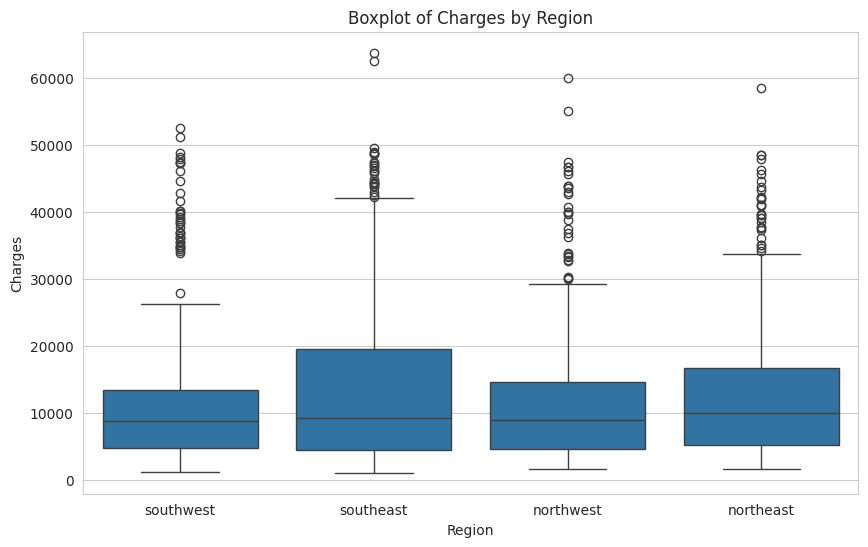

X shape:    region_northwest  region_southeast  region_southwest
0               0.0               0.0               1.0
1               0.0               1.0               0.0
2               0.0               1.0               0.0
3               1.0               0.0               0.0
4               1.0               0.0               0.0
y shape: 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
 145570599.31768084
R-squared score: 0.006634016807031462

Regression Coefficients for Regions:
              Region  Coefficient
0  region_northwest  -988.809142
1  region_southeast  1329.026921
2  region_southwest -1059.447139


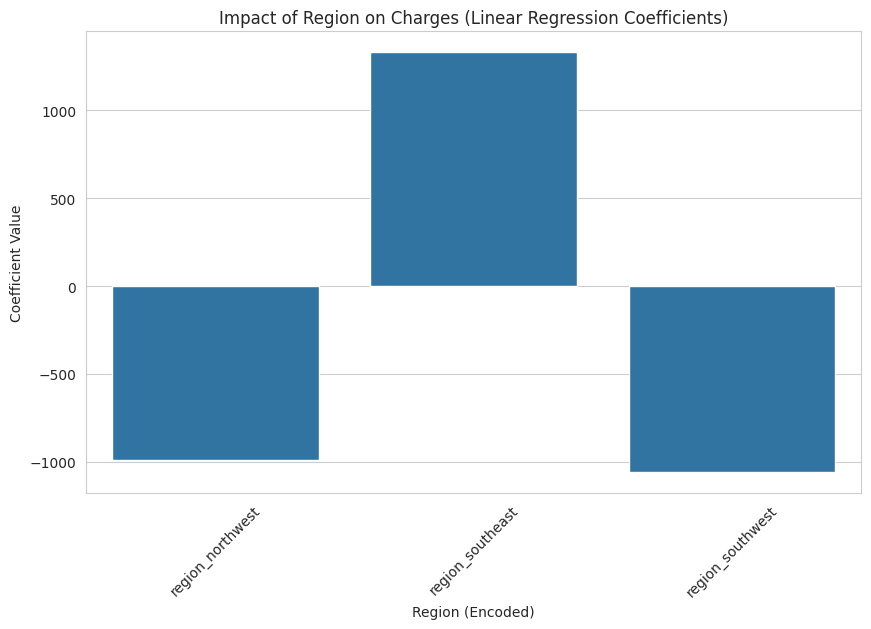

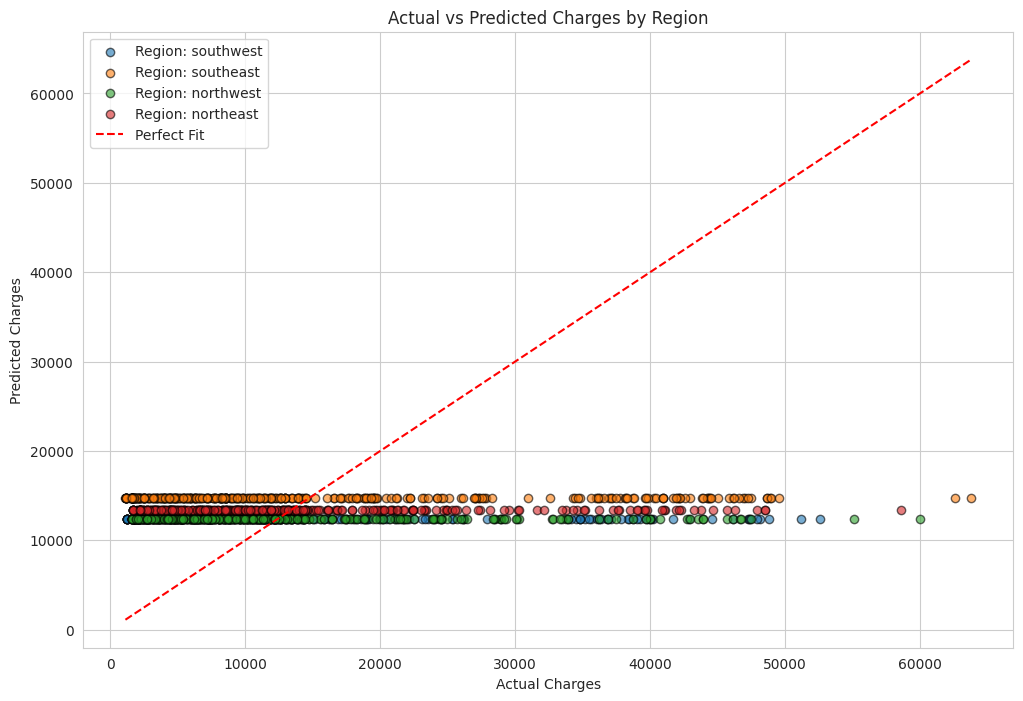

In [13]:
# Assuming the dataset is in a DataFrame called 'data'.
# Replace 'data' with your actual DataFrame variable.

# Column names
region_col = 'region'
charges_col = 'charges'

# 1. Check Cardinality of the `region` Variable
print("Unique regions:", df[region_col].unique())
print("Counts per region:\n", df[region_col].value_counts())

# 2. Mean/Median Analysis of `charges` by Region
region_stats = df.groupby(region_col)[charges_col].agg(["mean", "median", "count"]).reset_index()
print("\nRegion-wise mean/median charges:\n", region_stats)

# Bar plot for mean charges by region
plt.figure(figsize=(8, 5))
sns.barplot(x=region_col, y="mean", data=region_stats)
plt.title("Mean Charges by Region")
plt.xlabel("Region")
plt.ylabel("Mean Charges")
plt.show()

# 3. Boxplot Visualization for Region
plt.figure(figsize=(10, 6))
sns.boxplot(x=region_col, y=charges_col, data=df)
plt.title("Boxplot of Charges by Region")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

# 4. Regression Contributions by One-Hot Encoding (Trial Encoding)
# Encoding regions using one-hot encoding
encoder = OneHotEncoder(drop='first')
region_encoded = encoder.fit_transform(df[[region_col]]).toarray()
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out([region_col]))

# Prepare data for regression
X = pd.concat([region_encoded_df], axis=1)
y = df[charges_col]
print("X shape:", X.head())
print("y shape:", y.head())
# Perform regression
model = LinearRegression()
model.fit(X, y)
print("", mean_squared_error(y, model.predict(X)))
print("R-squared score:", r2_score(y, model.predict(X)))
# Display regression coefficients for each region
coefficients = pd.DataFrame({
    'Region': encoder.get_feature_names_out([region_col]),
    'Coefficient': model.coef_
})
print("\nRegression Coefficients for Regions:\n", coefficients)

# 5. Decision on Encoding
# If coefficients are significantly different across regions, stick with one-hot encoding.
# Otherwise, consider ordinal or other transformations based on the domain context.

plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="Coefficient", data=coefficients)
plt.title("Impact of Region on Charges (Linear Regression Coefficients)")
plt.xlabel("Region (Encoded)")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# 2. Scatter Plot: Actual vs Predicted Charges
# Predict charges using the linear regression model
predicted_charges = model.predict(X)

results = df.copy()
results["Predicted_Charges"] = predicted_charges

# Plot Actual vs Predicted Charges for each region
regions = df[region_col].unique()
plt.figure(figsize=(12, 8))

for region in regions:
    region_data = results[results[region_col] == region]

    plt.scatter(
        region_data[charges_col],
        region_data["Predicted_Charges"],
        alpha=0.6,
        edgecolor='k',
        label=f"Region: {region}"
    )

# Ideal line (Perfect Prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Fit")

# Plot settings
plt.title("Actual vs Predicted Charges by Region")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.grid(True)
plt.show()

   age     sex     bmi  children smoker     region      charges bmi_category
0   19  female  27.900         0    yes  southwest  16884.92400   overweight
1   18    male  33.770         1     no  southeast   1725.55230        obese
2   28    male  33.000         3     no  southeast   4449.46200        obese
3   33    male  22.705         0     no  northwest  21984.47061      healthy
4   32    male  28.880         0     no  northwest   3866.85520   overweight
Mean Squared Error: 23205088.714612264
R-squared score: 0.8505296082509899


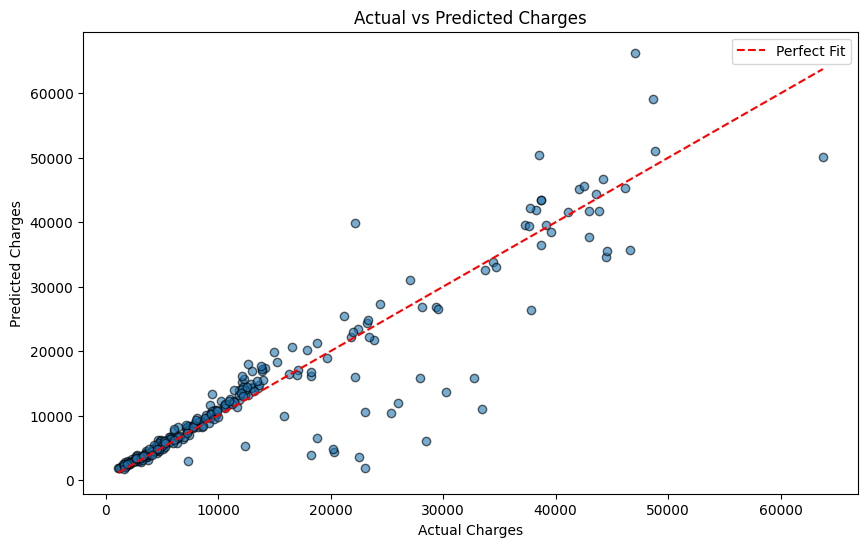

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define BMI categories using bins
bins = [0, 18.5, 24.9, 29.9, 35, df['bmi'].max()]
labels = ['underweight', 'healthy', 'overweight', 'obese', 'severely obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Step 2: One-hot encode the BMI categories
bmi_dummies = pd.get_dummies(df['bmi_category'], prefix="bmi")

# Step 3: Add these dummy columns to the DataFrame
regression_df = pd.concat([df, bmi_dummies], axis=1)

print(df.head())
# Step 4: Drop one dummy variable to avoid multicollinearity (reference category)
regression_df.drop(['bmi_obese', 'bmi_category'], axis=1, inplace=True)

# Step 5: Split the data into features and target
X = regression_df.drop('charges', axis=1)
y = regression_df['charges']

# Encode remaining categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Apply log transformation to the target variable
y_log = np.log(y)

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Step 6: Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.exp(y_pred_log)

# Step 8: Evaluate the model
mse = mean_squared_error(np.exp(y_test), y_pred)
r2 = r2_score(np.exp(y_test), y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

# Step 9: Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(y_test), y_pred, alpha=0.6, edgecolor='k')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--', label="Perfect Fit")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.legend()
plt.show()



         bmi    bmi_category
0     27.900      overweight
1     33.770           obese
2     33.000           obese
3     22.705         healthy
4     28.880      overweight
...      ...             ...
1333  30.970           obese
1334  31.920           obese
1335  36.850  severely obese
1336  25.800      overweight
1337  29.070      overweight

[1338 rows x 2 columns]
MAE: 4279.32
RMSE: 5825.95
R²: 0.77
      age     bmi      charges  cluster risk_level
0      19  27.900  16884.92400        0        Low
1      18  33.770   1725.55230        1     Medium
2      28  33.000   4449.46200        1     Medium
3      33  22.705  21984.47061        0        Low
4      32  28.880   3866.85520        0        Low
...   ...     ...          ...      ...        ...
1333   50  30.970  10600.54830        1     Medium
1334   18  31.920   2205.98080        1     Medium
1335   18  36.850   1629.83350        2       High
1336   21  25.800   2007.94500        0        Low
1337   61  29.070  29141.36030

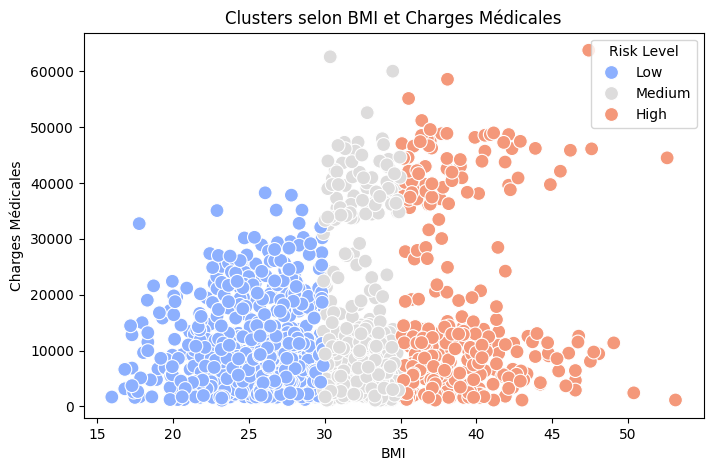

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/insurance.csv')

bins = [0, 18.5, 24.9, 29.9, 35, df['bmi'].max()]
labels = ['underweight', 'healthy', 'overweight', 'obese', 'severely obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, include_lowest=True)

print(df[['bmi', 'bmi_category']])

df_encoded =pd.get_dummies(df, columns=['sex', 'smoker', 'region', 'bmi_category'], drop_first=True)

X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 🔥 Niveau de risque basé sur les clusters
risk_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
df['risk_level'] = df['cluster'].map(risk_mapping)

print(df[['age', 'bmi', 'charges', 'cluster', 'risk_level']])

# 📊 7. Visualisation des clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', hue='risk_level', data=df, palette='coolwarm', s=100)
plt.title('Clusters selon BMI et Charges Médicales')
plt.xlabel('BMI')
plt.ylabel('Charges Médicales')
plt.legend(title='Risk Level')
plt.show()